In [1]:
# colab 연결용
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor,Lambda
from torchvision import transforms

In [2]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

In [4]:
from torch.utils.data import DataLoader
batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)

In [5]:
from torch import nn

In [6]:
# Feedforward Model
class MLP(torch.nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.linear_relu_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28*28, 512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Linear(512,512),
        nn.BatchNorm1d(512),
        nn.ReLU(),
        nn.Linear(512, 10),
    )
  def forward(self, x):
    outputs = self.linear_relu_stack(x)
    return outputs

In [72]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
lr = 0.001
epochs = 10
criterion = nn.CrossEntropyLoss().to(device)

loss_save_arrs = [[] for _ in range(6)]

In [73]:
def train(model, optimizer):
  for epoch in range(epochs):
    for batch_idx, (X_train, y_train) in enumerate(train_dataloader):
      # Train
      model.train()
      optimizer.zero_grad()
      X_train = X_train.to(device)
      y_train = y_train.to(device)
      pred = model(X_train)
      loss = criterion(pred, y_train)

      loss.backward()
      optimizer.step()
      
      if batch_idx % 100 == 0:
        loss, current = loss.item(), batch_idx * len(X_train)
        print(f"loss : {loss::>7f} [{current:>5d}/{len(train_dataloader.dataset):>5d}]")
        
    test_loss, correct = 0,0
    model.eval()
    with torch.no_grad():
      for X_test,y_test in test_dataloader:
        X_test = X_test.to(device)
        y_test = y_test.to(device)
        pred = model(X_test)
        test_loss += criterion(pred,y_test).item()
        correct += (pred.argmax(1) == y_test).type(torch.float).sum().item()
      test_loss /= len(test_dataloader)
      correct /= len(test_dataloader.dataset)
      print(f"Test Error:\n Accurancy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8}\n")
      loss_save_arr.append(test_loss)

In [74]:
model = MLP().to(device)
optimizer = torch.optim.SGD(model.parameters(),lr=lr)
loss_save_arr = loss_save_arrs[0]
train(model, optimizer)

loss : 2.348053 [    0/60000]
loss : 1.413731 [ 6400/60000]
loss : 1.081111 [12800/60000]
loss : 1.220740 [19200/60000]
loss : 0.920607 [25600/60000]
loss : 0.740973 [32000/60000]
loss : 0.747963 [38400/60000]
loss : 0.644471 [44800/60000]
loss : 0.639353 [51200/60000]
loss : 0.792560 [57600/60000]
Test Error:
 Accurancy: 79.5%, Avg loss: 0.6509152092277877

loss : 0.595342 [    0/60000]
loss : 0.659723 [ 6400/60000]
loss : 0.570701 [12800/60000]
loss : 0.555820 [19200/60000]
loss : 0.647472 [25600/60000]
loss : 0.691274 [32000/60000]
loss : 0.580141 [38400/60000]
loss : 0.583575 [44800/60000]
loss : 0.455874 [51200/60000]
loss : 0.675498 [57600/60000]
Test Error:
 Accurancy: 82.4%, Avg loss: 0.5317493490954198

loss : 0.558807 [    0/60000]
loss : 0.355102 [ 6400/60000]
loss : 0.604955 [12800/60000]
loss : 0.597875 [19200/60000]
loss : 0.596596 [25600/60000]
loss : 0.765936 [32000/60000]
loss : 0.661844 [38400/60000]
loss : 0.516772 [44800/60000]
loss : 0.470018 [51200/60000]
loss : 0

In [75]:
model = MLP().to(device)
optimizer = torch.optim.SGD(model.parameters(),lr=lr,momentum=0.9)
loss_save_arr = loss_save_arrs[1]
train(model, optimizer)

loss : 2.364751 [    0/60000]
loss : 0.712201 [ 6400/60000]
loss : 0.506952 [12800/60000]
loss : 0.462273 [19200/60000]
loss : 0.430042 [25600/60000]
loss : 0.450667 [32000/60000]
loss : 0.418646 [38400/60000]
loss : 0.393818 [44800/60000]
loss : 0.237447 [51200/60000]
loss : 0.557264 [57600/60000]
Test Error:
 Accurancy: 86.5%, Avg loss: 0.3764291978212816

loss : 0.325217 [    0/60000]
loss : 0.472020 [ 6400/60000]
loss : 0.447043 [12800/60000]
loss : 0.520858 [19200/60000]
loss : 0.466679 [25600/60000]
loss : 0.331781 [32000/60000]
loss : 0.503361 [38400/60000]
loss : 0.276930 [44800/60000]
loss : 0.420019 [51200/60000]
loss : 0.336097 [57600/60000]
Test Error:
 Accurancy: 89.2%, Avg loss: 0.3100986804074443

loss : 0.328804 [    0/60000]
loss : 0.340837 [ 6400/60000]
loss : 0.365009 [12800/60000]
loss : 0.374114 [19200/60000]
loss : 0.342925 [25600/60000]
loss : 0.345235 [32000/60000]
loss : 0.362124 [38400/60000]
loss : 0.374608 [44800/60000]
loss : 0.270046 [51200/60000]
loss : 0

In [76]:
model = MLP().to(device)
optimizer = torch.optim.SGD(model.parameters(),lr=lr,momentum=0.9,nesterov=True)
loss_save_arr = loss_save_arrs[2]
train(model, optimizer)

loss : 2.319982 [    0/60000]
loss : 0.805665 [ 6400/60000]
loss : 0.652186 [12800/60000]
loss : 0.698757 [19200/60000]
loss : 0.546804 [25600/60000]
loss : 0.467893 [32000/60000]
loss : 0.413130 [38400/60000]
loss : 0.512921 [44800/60000]
loss : 0.304816 [51200/60000]
loss : 0.307055 [57600/60000]
Test Error:
 Accurancy: 86.6%, Avg loss: 0.3765872484648914

loss : 0.308906 [    0/60000]
loss : 0.266101 [ 6400/60000]
loss : 0.280724 [12800/60000]
loss : 0.293280 [19200/60000]
loss : 0.612639 [25600/60000]
loss : 0.453351 [32000/60000]
loss : 0.324735 [38400/60000]
loss : 0.284991 [44800/60000]
loss : 0.335413 [51200/60000]
loss : 0.253975 [57600/60000]
Test Error:
 Accurancy: 88.4%, Avg loss: 0.3243044111758534

loss : 0.286053 [    0/60000]
loss : 0.223837 [ 6400/60000]
loss : 0.314519 [12800/60000]
loss : 0.290272 [19200/60000]
loss : 0.275678 [25600/60000]
loss : 0.347792 [32000/60000]
loss : 0.326102 [38400/60000]
loss : 0.295220 [44800/60000]
loss : 0.285329 [51200/60000]
loss : 0

In [77]:
model = MLP().to(device)
optimizer = torch.optim.Adagrad(model.parameters())
loss_save_arr = loss_save_arrs[3]
train(model, optimizer)

loss : 2.378953 [    0/60000]
loss : 0.547936 [ 6400/60000]
loss : 0.626221 [12800/60000]
loss : 0.378807 [19200/60000]
loss : 0.287049 [25600/60000]
loss : 0.267420 [32000/60000]
loss : 0.341462 [38400/60000]
loss : 0.251989 [44800/60000]
loss : 0.393479 [51200/60000]
loss : 0.220238 [57600/60000]
Test Error:
 Accurancy: 88.7%, Avg loss: 0.3071100100445976

loss : 0.397961 [    0/60000]
loss : 0.261122 [ 6400/60000]
loss : 0.242817 [12800/60000]
loss : 0.332979 [19200/60000]
loss : 0.510918 [25600/60000]
loss : 0.296662 [32000/60000]
loss : 0.362996 [38400/60000]
loss : 0.195706 [44800/60000]
loss : 0.262267 [51200/60000]
loss : 0.252682 [57600/60000]
Test Error:
 Accurancy: 88.7%, Avg loss: 0.300979908380999

loss : 0.292807 [    0/60000]
loss : 0.349911 [ 6400/60000]
loss : 0.210260 [12800/60000]
loss : 0.259959 [19200/60000]
loss : 0.334167 [25600/60000]
loss : 0.262951 [32000/60000]
loss : 0.356032 [38400/60000]
loss : 0.210877 [44800/60000]
loss : 0.308330 [51200/60000]
loss : 0.

In [78]:
model = MLP().to(device)
optimizer = torch.optim.RMSprop(model.parameters())
loss_save_arr = loss_save_arrs[4]
train(model, optimizer)

loss : 2.436244 [    0/60000]
loss : 0.603112 [ 6400/60000]
loss : 0.589278 [12800/60000]
loss : 0.438952 [19200/60000]
loss : 0.396348 [25600/60000]
loss : 0.445357 [32000/60000]
loss : 0.459952 [38400/60000]
loss : 0.421687 [44800/60000]
loss : 0.428152 [51200/60000]
loss : 0.451489 [57600/60000]
Test Error:
 Accurancy: 86.4%, Avg loss: 0.37274699774123965

loss : 0.355457 [    0/60000]
loss : 0.265308 [ 6400/60000]
loss : 0.471120 [12800/60000]
loss : 0.370705 [19200/60000]
loss : 0.359951 [25600/60000]
loss : 0.292408 [32000/60000]
loss : 0.485197 [38400/60000]
loss : 0.449542 [44800/60000]
loss : 0.483420 [51200/60000]
loss : 0.389426 [57600/60000]
Test Error:
 Accurancy: 87.9%, Avg loss: 0.3181831310155676

loss : 0.233195 [    0/60000]
loss : 0.468927 [ 6400/60000]
loss : 0.273306 [12800/60000]
loss : 0.416029 [19200/60000]
loss : 0.264585 [25600/60000]
loss : 0.248258 [32000/60000]
loss : 0.371320 [38400/60000]
loss : 0.309424 [44800/60000]
loss : 0.374333 [51200/60000]
loss : 

In [79]:
model = MLP().to(device)
optimizer = torch.optim.Adam(model.parameters())
loss_save_arr = loss_save_arrs[5]
train(model, optimizer)

loss : 2.390459 [    0/60000]
loss : 0.493383 [ 6400/60000]
loss : 0.618398 [12800/60000]
loss : 0.363813 [19200/60000]
loss : 0.220401 [25600/60000]
loss : 0.264420 [32000/60000]
loss : 0.596298 [38400/60000]
loss : 0.516410 [44800/60000]
loss : 0.390020 [51200/60000]
loss : 0.291861 [57600/60000]
Test Error:
 Accurancy: 87.9%, Avg loss: 0.3244418451018425

loss : 0.280689 [    0/60000]
loss : 0.396078 [ 6400/60000]
loss : 0.369214 [12800/60000]
loss : 0.265212 [19200/60000]
loss : 0.287462 [25600/60000]
loss : 0.253215 [32000/60000]
loss : 0.240599 [38400/60000]
loss : 0.437706 [44800/60000]
loss : 0.347861 [51200/60000]
loss : 0.248041 [57600/60000]
Test Error:
 Accurancy: 87.9%, Avg loss: 0.3039680088379744

loss : 0.233061 [    0/60000]
loss : 0.426709 [ 6400/60000]
loss : 0.256153 [12800/60000]
loss : 0.261654 [19200/60000]
loss : 0.189229 [25600/60000]
loss : 0.233271 [32000/60000]
loss : 0.498859 [38400/60000]
loss : 0.217308 [44800/60000]
loss : 0.381694 [51200/60000]
loss : 0

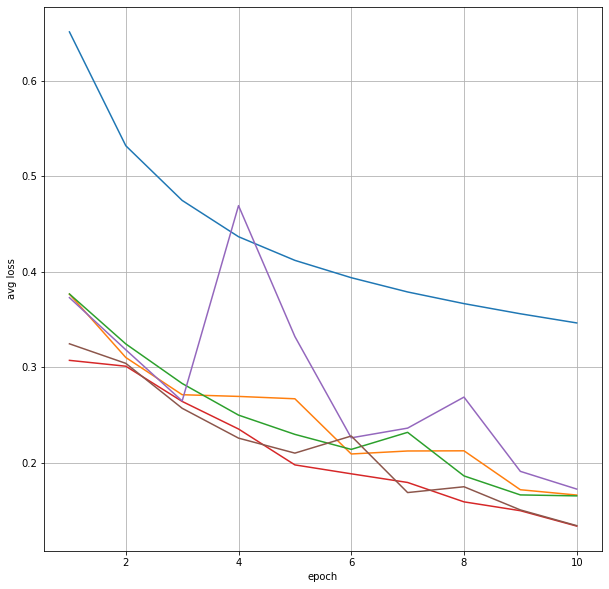

In [80]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.xlabel('epoch')
plt.ylabel('avg loss')
plt.grid()
for loss_save_arr in loss_save_arrs:
  plt.plot(range(1,epochs+1), [e for e in loss_save_arr])